In [1]:
%matplotlib inline
# Dependencies and Setup
#plotting code adapted from https://www.kaggle.com/balagpdy/heatmap-animation-us-drought-map
import pandas as pd
import numpy as np
from data_extraction import drought_data
from IPython.display import HTML
from data_extraction_fires import fires_data

In [2]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
import os
#os.which('ffmpeg')

In [3]:
test_df = fires_data()
test_df

,LATITUDE,LONGITUDE,FIRE_TYPE,IG_DATE,ACRES,YEAR,MILES
0,62.949,-162.901,Wildfire,2000-12-27,12003,2000,18.754687
1,63.767,-152.076,Wildfire,2000-06-23,18065,2000,28.226562
2,63.833,-155.804,Wildfire,2000-06-25,31347,2000,48.979688
3,63.838,-150.726,Wildfire,2000-06-25,4863,2000,7.598438
4,63.872,-150.715,Wildfire,2000-06-24,12071,2000,18.860938
...,...,...,...,...,...,...,...
8298,44.731,-110.982,Wildfire,2016-08-09,103193,2016,161.239063
8299,44.867,-109.700,Wildfire,2016-08-10,3702,2016,5.784375
8300,44.936,-110.913,Wildfire,2016-08-05,3161,2016,4.939063
8301,44.981,-110.291,Wildfire,2016-08-13,13706,2016,21.415625


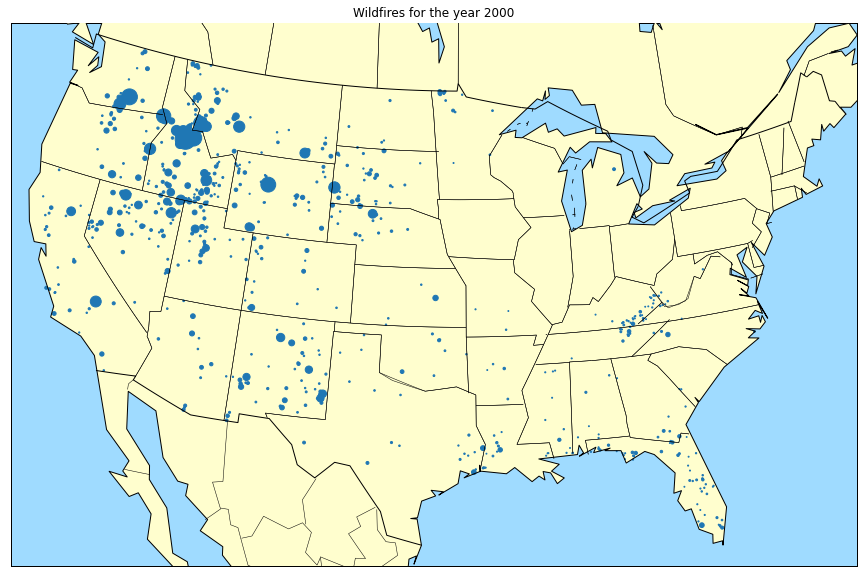

In [18]:
#set initial values before updating
figure=plt.figure(figsize=(20,10))
axes=figure.add_subplot(111)
#using same projection as example map because I liked how it looked like
basemap=Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection="lcc",lat_1=33,lat_2=45,lon_0=-95)
basemap.drawcoastlines()
basemap.drawmapboundary(zorder=0,fill_color='#9fdbff')
basemap.fillcontinents(color='#FFFECE',zorder=1,lake_color='#9fdbff',alpha=1)
basemap.drawcountries(linewidth=1)
basemap.drawstates()
#Basemap is finished setting up, 
pdf=test_df
xloc,yloc=basemap(pdf.LONGITUDE.tolist(),pdf.LATITUDE.tolist())
#color=pdf.LONGITUDE.Level.tolist()
pointsize=(pdf.MILES).tolist()
#colormap=plt.cm.YlOrRd
#scalarmap = ScalarMappable(cmap=colormap)
scatter = axes.scatter(xloc,yloc,s=pointsize,alpha=1,edgecolors='face',marker='o',vmax=5,vmin=0,zorder=1.5)
#plt.colorbar(scatter)
#plt.title('US Average Drought Level for the Year '+pdf.nth(0).releaseDate.iloc[0].strftime('%Y'))

def update(frame):
    axes.clear()
    basemap=Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection="lcc",lat_1=33,lat_2=45,lon_0=-95)
    basemap.drawcoastlines()
    basemap.drawmapboundary(zorder=0,fill_color='#9fdbff')
    basemap.fillcontinents(color='#FFFECE',zorder=1,lake_color='#9fdbff',alpha=1)
    basemap.drawcountries(linewidth=1)
    basemap.drawstates()
    year = frame+2000
    #print(year)
    test_df = pdf.loc[pdf["YEAR"]==(year)]  
    xloc,yloc=basemap(test_df.LONGITUDE.tolist(),test_df.LATITUDE.tolist())
    pointsize=(test_df.MILES).tolist()
    scatter = axes.scatter(xloc,yloc,s=pointsize,alpha=1,edgecolors='face',marker='o',vmax=5,vmin=0,zorder=1.5)
    plt.title(f'Wildfires for the year {year}')
    
    return scatter
    

    
#color=pdf.L(frame).Level.tolist()
#scatter.set_color(scalarmap.to_rgba(color))

                  
anim=animation.FuncAnimation(figure,func=update,frames=17,interval=1000)
anim.save('Fires_map.gif', writer='imagemagick')

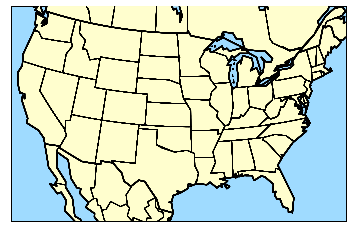

In [15]:
HTML(anim.to_html5_video())
#This function will not have an output, to display the result in jupyter do the following:
#from IPython.display import Image
#Image("img/picture.png")

In [6]:
len(anim)

TypeError: object of type 'FuncAnimation' has no len()